# 1.a

In [1]:
import warnings
warnings.filterwarnings('ignore')

import sklearn
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
movie_data = pd.read_csv("mergedMovies")

mergedMovies is movies combined with data scraped from IMDB and data from MovieLens

In [3]:
movie_data.head()

,Movie ID,Genre,Name,Year,Director,Cast,imDB rating
0,2,Adventure|Children's|Fantasy,Jumanji,1995,Joe Johnston,"Robin Williams, Jonathan Hyde",6.9
1,1,Animation|Children's|Comedy,Toy Story,1995,John Lasseter,"Tom Hanks, Tim Allen",8.3
2,8,Adventure|Children's,Tom and Huck,1995,Peter Hewitt,"Jonathan Taylor Thomas, Brad Renfro",5.6
3,5,Comedy,Father of the Bride Part II,1995,Charles Shyer,"Steve Martin, Diane Keaton",5.9
4,7,Comedy|Romance,Sabrina,1995,Sydney Pollack,"Harrison Ford, Julia Ormond",6.2


In [27]:
#genres = {"Action":0,"Adventure":0,"Animation":0,"Children's":0,}
genres={}
num = {}
cast=[]
director = []
movieID_genre = {}
movieid_ID = {}
for index,it in movie_data.iterrows():
    genre= it["Genre"]
    genre = genre.split("|")
    movieid_ID[index] = it["Movie ID"]
    movieID_genre[it["Movie ID"]] = genre
    s = str(it["Cast"])
    s1 = str(it["Director"])
    cast.append(unicode(s, "utf-8"))
    director.append(unicode(s1, "utf-8"))
    for g in genre:
        if genres.has_key(g)==False:
            genres[g] = 0;
            num[g]=0
        genres[g]=genres[g]+it["imDB rating"]
        num[g]=num[g]+1
for key in genres.keys():
    genres[key] = genres[key]/num[key]

{'Mystery': 6.915254237288138, 'Drama': 6.845997610513735, 'Sci-Fi': 6.309459459459456, 'Fantasy': 6.1375, 'Horror': 6.010606060606061, 'Film-Noir': 7.36, 'Crime': 6.798387096774194, 'Romance': 6.614388489208631, "Children's": 6.165765765765763, 'Musical': 6.9803571428571445, 'Animation': 7.117948717948717, 'Adventure': 6.247590361445784, 'Action': 6.188888888888884, 'Comedy': 6.335497835497838, 'Documentary': 7.33469387755102, 'War': 7.04805194805195, 'Thriller': 6.452788104089219, 'Western': 6.995454545454546}


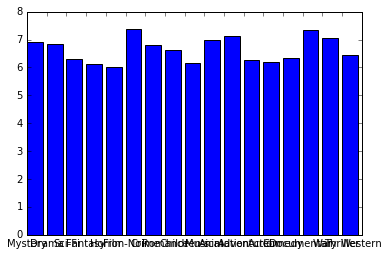

In [5]:
print genres
width = 1
x = range(len(genres))
#plt.bar(range(len(genres)), genres.values(),width = )
plt.bar([ x_tmp*100 for x_tmp in  x],[y for y in genres.values()],width = 80)

plt.xlim(x[0]-0.5*width, x[-1]+1.5*width)
plt.xticks([ x_tmp*100 for x_tmp in  x],[x for x in genres.keys()])
#plt.xticks(x, genres.keys())
plt.show()

The average ratings for movies of some genres are higher than other movies, like Film-Noir, Documentary, War, Animation. In contrast, movies of some genres easily get lower ratings, like Horror, Action, Children's. These results make sense. Movies of some genres are better produced than other genres. So they get higher average ratings.

# 1.b

In [6]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=1)
vectorizer1 = CountVectorizer(min_df=1)
X_cast = vectorizer.fit_transform(cast)
cast = X_cast.toarray()
X_director = vectorizer1.fit_transform(director)
director = X_director.toarray()

In [7]:
feature = {}
features = []
for key in genres.keys():
    feature[key] = 0
for index,it in movie_data.iterrows():
    tmp_feature = feature.copy()
    genre= it["Genre"]
    genre = genre.split("|")
    for g in genre:
        tmp_feature[g] = 1
    features.append(tmp_feature)

In [8]:
measurements = []
for i in range(len(features)):
    fea = list(features[i].values())
    measurements.append(fea)
    #measurements.append(fea+list(director[i]))

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(measurements)
measure_reduced = pca.transform(measurements)
#pca.fit(features)
#features_reduced = pca.transform(features)

In [10]:
print("Reduced dataset shape:", measure_reduced.shape)

('Reduced dataset shape:', (2033, 2))


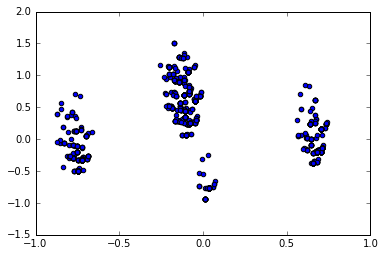

In [11]:
import pylab as pl
pl.scatter(measure_reduced[:, 0], measure_reduced[:, 1])

In [30]:
movieid_ID[1]

1

I cluster movies based on movies features(director, cast, genres). Now we have 4 clusters for the movie dataset by eyes. Now I am going to use K-means to do the cluster.

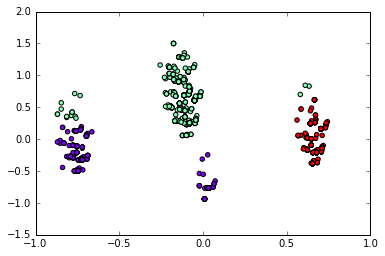

In [41]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=3, random_state=0) # Fixing the RNG in kmeans
k_means.fit(measure_reduced)


pl.scatter(measure_reduced[:, 0], measure_reduced[:, 1], c=k_means.labels_,
           cmap='rainbow');

In [13]:
print len(set(k_means.labels_))

4


In [26]:
movie_data

['Adventure', "Children's", 'Fantasy']

3


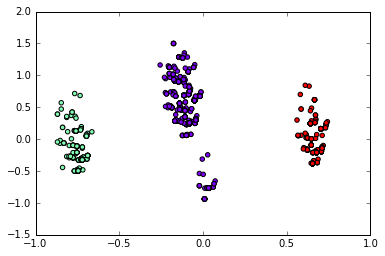

In [21]:
from sklearn.cluster import DBSCAN 
db_scan = DBSCAN(eps=0.5, min_samples=70)
db_scan.fit(measure_reduced)

print(len(set(db_scan.labels_)))
pl.scatter(measure_reduced[:, 0], measure_reduced[:, 1], c=db_scan.labels_,
           cmap='rainbow');


In [42]:
movie_data["label"] = db_scan.labels_

In [43]:
movie_data_0 = movie_data[movie_data.label==0]
movie_data_1 = movie_data[movie_data.label==1]
movie_data_2 = movie_data[movie_data.label==2]


In [45]:
movie_data_0.to_csv("movie_set_0", sep='\t', encoding='utf-8')
movie_data_1.to_csv("movie_set_1", sep='\t', encoding='utf-8')
movie_data_2.to_csv("movie_set_2", sep='\t', encoding='utf-8')

In [32]:
set0 = []
set1 = []
set2 = []

In [36]:
i = 0
for key in movieid_ID.keys():
    official_movie_id = movieid_ID.get(key)
    movie_label = db_scan.labels_[key]
    if movie_label==0:
        set0.append(official_movie_id)
    elif movie_label==1:
        set1.append(official_movie_id)
    else:
        set2.append(official_movie_id)

In [44]:
len(movie_data_0)+len(set1)+len(set2)

2033

I also clustered use DBSCAN model. And now I get three clusters.set0, set1 and set2 based on DBSCAN because it clusters better compared to K-Means.

In [ ]:
import csv

# 2 task: find relationship between movies' genres and user_ages

In [15]:
user_ratings_data = pd.read_csv("finalcsv",names = ["user_age","movie","ratings"])

In [16]:
user_ratings_data.head()

,user_age,movie,ratings
0,1,1193,5
1,1,661,3
2,1,914,3
3,1,3408,4
4,1,2355,5


In [17]:
print(set(user_ratings_data["user_age"]))
print(genres.keys())

set([1, 18, 35, 45, 50, 56, 25])
['Mystery', 'Drama', 'Sci-Fi', 'Fantasy', 'Horror', 'Film-Noir', 'Crime', 'Romance', "Children's", 'Musical', 'Animation', 'Adventure', 'Action', 'Comedy', 'Documentary', 'War', 'Thriller', 'Western']


In [18]:
user_genre = {}
user_genre[25] = {}
user_genre[1] = {}
user_genre[35] = {}
user_genre[45] = {}
user_genre[50] = {}
user_genre[56] = {}
user_genre[18] = {}
for key in user_genre.keys():
    for key_genre in genres.keys():
        user_genre[key][key_genre] = 0

        #print user_genre[25][genre]
# print indexx
# print index

In [20]:
print(user_genre[1])

{'Mystery': 0, 'Romance': 0, 'Sci-Fi': 0, "Children's": 0, 'Horror': 0, 'Film-Noir': 0, 'Crime': 0, 'Drama': 0, 'Fantasy': 0, 'Animation': 0, 'War': 0, 'Adventure': 0, 'Action': 0, 'Comedy': 0, 'Documentary': 0, 'Musical': 0, 'Thriller': 0, 'Western': 0}


In [21]:
for index,it in user_ratings_data.iterrows():
    age = it["user_age"]
    if movieID_genre.has_key(it["movie"])==False:
        continue;   
    for genre in movieID_genre[it["movie"]]:
        user_genre[age][genre]= user_genre[age][genre]+1

In [22]:
print(user_genre[25])

{'Mystery': 8520, 'Romance': 39312, 'Sci-Fi': 37840, "Children's": 11157, 'Horror': 11945, 'Film-Noir': 3722, 'Crime': 18544, 'Drama': 82532, 'Fantasy': 6226, 'Animation': 6302, 'War': 16567, 'Adventure': 33294, 'Action': 60154, 'Comedy': 92278, 'Documentary': 1757, 'Musical': 6937, 'Thriller': 38926, 'Western': 5500}


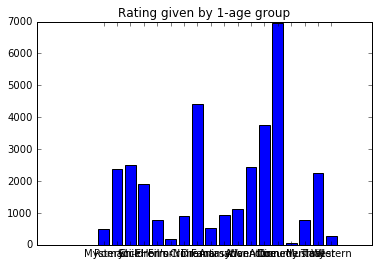

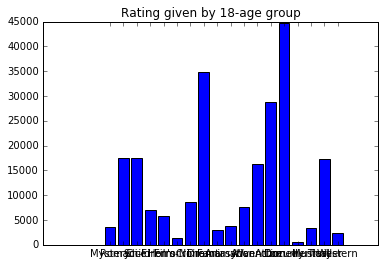

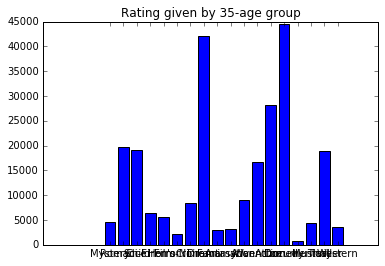

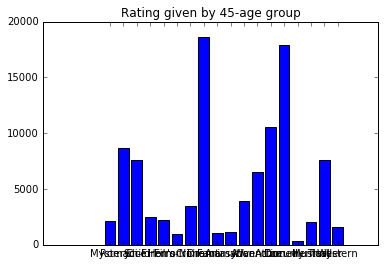

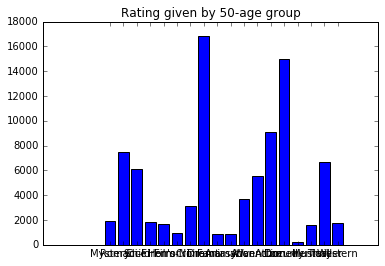

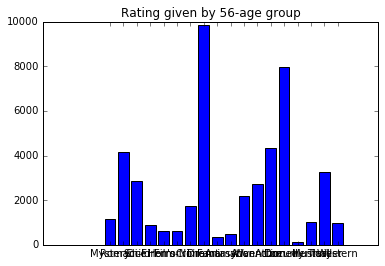

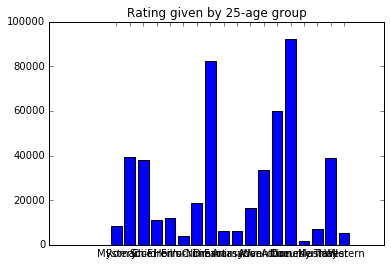

In [31]:
for key in user_genre.keys():
    plt.bar(range(len(user_genre[key])), user_genre[key].values(), align='center')
    plt.xticks(range(len(user_genre[key])), user_genre[key].keys())
    plt.title('Rating given by %d-age group'%(key))
    plt.show()

Analysis: people of different age goups have similar tastes about movies. Although numbers of ratings given to each genre by different age groups are quite different, trends are similar. Most popular movies are comedy and drama movies. Younger people prefer comdey to drama. Older people prefer drama to comedy.